<a href="https://colab.research.google.com/github/nyaswanth2004/FMML_LABS-PROJECTS/blob/main/FMML_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

```
Coordinator: Aswin Jose
```

---

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [ ]:
from google.colab import files
uploaded1 = files.upload()

In [ ]:
data = pd.read_csv("heart.csv")
data.head()

In [ ]:
data.shape

In [ ]:
data.columns


Data preparation

In [ ]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [ ]:
data.head()

First, lets look at the difference in the number of samples with and without disease using a barplot.

In [ ]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

In [ ]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

In [ ]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do

In [ ]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

In [ ]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

In [ ]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

In [ ]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    ## to do


In [20]:
# Visualising the distribution of the continous variables

In [ ]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

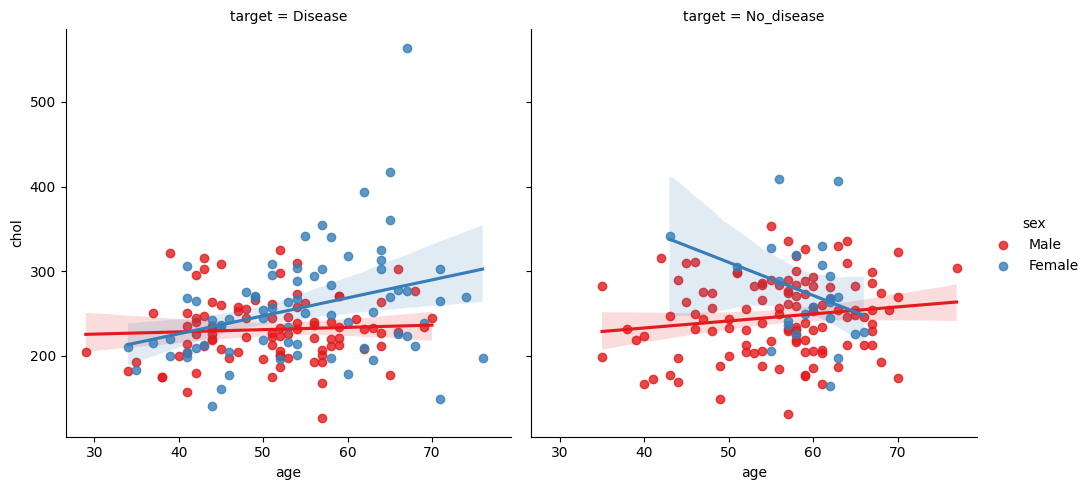

In [21]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

In [ ]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

In [ ]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

In [ ]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


In [ ]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


In [ ]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

1. *Percentage of Samples with Disease*:
   - To calculate this, you need to divide the number of samples with the disease by the total number of samples and then multiply by 100. For example, if you have 1000 samples and 200 of them have the disease, the percentage would be:
     $$
     \text{Percentage} = \left(\frac{\text{Number of samples with disease}}{\text{Total number of samples}}\right) \times 100 = \left(\frac{200}{1000}\right) \times 100 = 20\%
     $$

2. *Three Continuous Features with Significant Statistical Difference*:
   - To identify these features, you can perform statistical tests such as the t-test or ANOVA. These tests compare the means of the features between the groups (presence and absence of disease) and determine if the differences are statistically significant. Features with the lowest p-values are considered to have significant differences.

3. *Separation in PCA and t-SNE Plots*:
   - PCA (Principal Component Analysis) and t-SNE (t-distributed Stochastic Neighbor Embedding) are dimensionality reduction techniques. To see clear separation, you would plot the first two or three principal components (for PCA) or the t-SNE components and color the points based on the presence or absence of the disease. Clear clusters or separation in the plot would indicate that the features can distinguish between the two groups.

4. *Optimal Number of Principal Components*:
   - The optimal number of principal components can be determined by looking at the explained variance ratio. Typically, you would choose the number of components that explain a high percentage (e.g., 95%) of the variance in the data. This can be visualized using a scree plot, where you plot the cumulative explained variance against the number of components.

5. *Continuous Features with the Highest Correlation*:
   - To find the features with the highest correlation, you can calculate the Pearson correlation coefficient for all pairs of continuous features. Features with correlation coefficients close to +1 or -1 have the highest correlation. You can visualize this using a correlation matrix heatmap
   

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [19]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [ ]:
data = pd.read_csv("star_nutri_expanded.csv")

In [ ]:
data.head()

cleaning and filling the missing values in the data

In [ ]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [ ]:
data['Total Fat (g)'].unique()

In [ ]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [ ]:
data.info()

In [ ]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [ ]:
data['Beverage_category'].unique()

In [ ]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [ ]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [ ]:

data = data.replace({True: 1, False: 0})


In [ ]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
## to do

# Create a pie chart of the 'Tea' column also write your observation form the plot



In [ ]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?


In [ ]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?


In [ ]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?


In [ ]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?


In [ ]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?


To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.